In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: Prepare Your Data

Python version 3.10.0

In [ ]:
# face_recognizer/
# ├── output/
# |
# ├── training/
# │   └── nicolas_cage/
# │       ├─ class0
# │       └─ class1
# |
# ├── validation/
# │   └── nicolas_cage/
# │       ├── class0
# │       └── class1
# |
# ├── detector
# └── unknown.jpg

In [2]:
%pip install keras tensorflow Pillow scikit-learn

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
import math
from sklearn import neighbors
import os
import os.path
import pickle
from PIL import Image, ImageDraw

In [4]:
# building our model
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dropout(0.5))

# output layer
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

In [5]:
# Compiling our model:
classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Step 2: Load Training Data and Train Your Model

In [6]:
os.listdir("/content/drive/MyDrive/PDAN8411 ICE 1/Nicolas_Cage-master/Nicolas_Cage-master/Dataset/train")

['class1', 'class0']

In [7]:
# Image augmentations
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [8]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/PDAN8411 ICE 1/Nicolas_Cage-master/Nicolas_Cage-master/Dataset/train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = "binary")

print(training_set.class_indices)

Found 290 images belonging to 2 classes.
{'class0': 0, 'class1': 1}


In [9]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/PDAN8411 ICE 1/Nicolas_Cage-master/Nicolas_Cage-master/Dataset/test',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            shuffle = True,
                                            class_mode = "binary")
print(test_set.class_indices)

Found 124 images belonging to 2 classes.
{'class0': 0, 'class1': 1}


In [11]:
# training our network
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 100)

<ipython-input-11-93d5dfb26cb3>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 0.6829 - accuracy: 0.5586

10/10 [==============================] - 37s 4s/step - loss: 0.6829 - accuracy: 0.5586 - val_loss: 0.6605 - val_accuracy: 0.6532
Epoch 2/25
10/10 [==============================] - 24s 2s/step - loss: 0.6646 - accuracy: 0.6138
Epoch 3/25
10/10 [==============================] - 20s 2s/step - loss: 0.6472 - accuracy: 0.6276
Epoch 4/25
10/10 [==============================] - 21s 2s/step - loss: 0.6695 - accuracy: 0.6138
Epoch 5/25
10/10 [==============================] - 20s 2s/step - loss: 0.6039 - accuracy: 0.6759
Epoch 6/25
10/10 [==============================] - 21s 2s/step - loss: 0.6631 - accuracy: 0.5897
Epoch 7/25
10/10 [==============================] - 20s 2s/step - loss: 0.6277 - accuracy: 0.6759
Epoch 8/25
10/10 [==============================] - 20s 2s/step - loss: 0.5889 - accuracy: 0.6931
Epoch 9/25
10/10 [==============================] - 21s 2s/step - loss: 0.5789 - accuracy: 0.6793
Epoch 10/25
10/10 [==============================] - 19s 2s/step - loss: 0.5801 - accur

In [12]:
from keras.callbacks import LearningRateScheduler, EarlyStopping

def lr_schedule(epoch):
    lr = 0.01 * (0.9 ** epoch)
    print(f"Learning rate: {lr:.10f}")
    return lr

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 100,
                         callbacks=[LearningRateScheduler(lr_schedule), early_stopping])

<ipython-input-12-3675334e6644>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


Learning rate: 0.0100000000
Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 0.2877 - accuracy: 0.8931

10/10 [==============================] - 25s 3s/step - loss: 0.2877 - accuracy: 0.8931 - val_loss: 0.3856 - val_accuracy: 0.8710 - lr: 0.0100
Learning rate: 0.0090000000
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 0.2918 - accuracy: 0.9000

10/10 [==============================] - 20s 2s/step - loss: 0.2918 - accuracy: 0.9000 - lr: 0.0090
Learning rate: 0.0081000000
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 0.2986 - accuracy: 0.9138

10/10 [==============================] - 20s 2s/step - loss: 0.2986 - accuracy: 0.9138 - lr: 0.0081
Learning rate: 0.0072900000
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 0.2538 - accuracy: 0.9172

10/10 [==============================] - 22s 2s/step - loss: 0.2538 - accuracy: 0.9172 - lr: 0.0073
Learning rate: 0.0065610000
Epoch 5/25
10/10 [==============================] - ETA: 0s - loss: 0.2778 - accuracy: 0.9172

10/10 [==============================] - 20s 2s/step - loss: 0.2778 - accuracy: 0.9172 - lr: 0.0066
Learning rate: 0.0059049000
Epoch 6/25
10/10 [==============================] - ETA: 0s - loss: 0.2788 - accuracy: 0.9069

10/10 [==============================] - 20s 2s/step - loss: 0.2788 - accuracy: 0.9069 - lr: 0.0059
Learning rate: 0.0053144100
Epoch 7/25
10/10 [==============================] - ETA: 0s - loss: 0.2523 - accuracy: 0.9172

10/10 [==============================] - 20s 2s/step - loss: 0.2523 - accuracy: 0.9172 - lr: 0.0053
Learning rate: 0.0047829690
Epoch 8/25
10/10 [==============================] - ETA: 0s - loss: 0.2526 - accuracy: 0.9276

10/10 [==============================] - 22s 2s/step - loss: 0.2526 - accuracy: 0.9276 - lr: 0.0048
Learning rate: 0.0043046721
Epoch 9/25
10/10 [==============================] - ETA: 0s - loss: 0.2495 - accuracy: 0.9172

10/10 [==============================] - 20s 2s/step - loss: 0.2495 - accuracy: 0.9172 - lr: 0.0043
Learning rate: 0.0038742049
Epoch 10/25
10/10 [==============================] - ETA: 0s - loss: 0.2777 - accuracy: 0.8862

10/10 [==============================] - 20s 2s/step - loss: 0.2777 - accuracy: 0.8862 - lr: 0.0039
Learning rate: 0.0034867844
Epoch 11/25
10/10 [==============================] - ETA: 0s - loss: 0.2353 - accuracy: 0.9310

10/10 [==============================] - 20s 2s/step - loss: 0.2353 - accuracy: 0.9310 - lr: 0.0035
Learning rate: 0.0031381060
Epoch 12/25
10/10 [==============================] - ETA: 0s - loss: 0.2237 - accuracy: 0.9414

10/10 [==============================] - 21s 2s/step - loss: 0.2237 - accuracy: 0.9414 - lr: 0.0031
Learning rate: 0.0028242954
Epoch 13/25
10/10 [==============================] - ETA: 0s - loss: 0.2315 - accuracy: 0.9207

10/10 [==============================] - 20s 2s/step - loss: 0.2315 - accuracy: 0.9207 - lr: 0.0028
Learning rate: 0.0025418658
Epoch 14/25
10/10 [==============================] - ETA: 0s - loss: 0.2551 - accuracy: 0.9310

10/10 [==============================] - 20s 2s/step - loss: 0.2551 - accuracy: 0.9310 - lr: 0.0025
Learning rate: 0.0022876792
Epoch 15/25
10/10 [==============================] - ETA: 0s - loss: 0.2217 - accuracy: 0.9276

10/10 [==============================] - 21s 2s/step - loss: 0.2217 - accuracy: 0.9276 - lr: 0.0023
Learning rate: 0.0020589113
Epoch 16/25
10/10 [==============================] - ETA: 0s - loss: 0.2386 - accuracy: 0.9276

10/10 [==============================] - 30s 3s/step - loss: 0.2386 - accuracy: 0.9276 - lr: 0.0021
Learning rate: 0.0018530202
Epoch 17/25
10/10 [==============================] - ETA: 0s - loss: 0.2387 - accuracy: 0.9138

10/10 [==============================] - 20s 2s/step - loss: 0.2387 - accuracy: 0.9138 - lr: 0.0019
Learning rate: 0.0016677182
Epoch 18/25
10/10 [==============================] - ETA: 0s - loss: 0.2234 - accuracy: 0.9310

10/10 [==============================] - 20s 2s/step - loss: 0.2234 - accuracy: 0.9310 - lr: 0.0017
Learning rate: 0.0015009464
Epoch 19/25
10/10 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.9345

10/10 [==============================] - 20s 2s/step - loss: 0.2423 - accuracy: 0.9345 - lr: 0.0015
Learning rate: 0.0013508517
Epoch 20/25
10/10 [==============================] - ETA: 0s - loss: 0.2338 - accuracy: 0.9379

10/10 [==============================] - 22s 2s/step - loss: 0.2338 - accuracy: 0.9379 - lr: 0.0014
Learning rate: 0.0012157665
Epoch 21/25
10/10 [==============================] - ETA: 0s - loss: 0.2356 - accuracy: 0.9276

10/10 [==============================] - 20s 2s/step - loss: 0.2356 - accuracy: 0.9276 - lr: 0.0012
Learning rate: 0.0010941899
Epoch 22/25
10/10 [==============================] - ETA: 0s - loss: 0.2210 - accuracy: 0.9345

10/10 [==============================] - 20s 2s/step - loss: 0.2210 - accuracy: 0.9345 - lr: 0.0011
Learning rate: 0.0009847709
Epoch 23/25
10/10 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9379

10/10 [==============================] - 21s 2s/step - loss: 0.2120 - accuracy: 0.9379 - lr: 9.8477e-04
Learning rate: 0.0008862938
Epoch 24/25
10/10 [==============================] - ETA: 0s - loss: 0.2309 - accuracy: 0.9276

10/10 [==============================] - 20s 2s/step - loss: 0.2309 - accuracy: 0.9276 - lr: 8.8629e-04
Learning rate: 0.0007976644
Epoch 25/25
10/10 [==============================] - ETA: 0s - loss: 0.2254 - accuracy: 0.9379

10/10 [==============================] - 22s 2s/step - loss: 0.2254 - accuracy: 0.9379 - lr: 7.9766e-04


In [18]:
##########################
# SAVE-LOAD using pickle #
##########################
import pickle

# save
with open('/content/drive/MyDrive/PDAN8411 ICE 1/model_classifier.pkl','wb') as f:
    pickle.dump(history,f)

# # load
# with open('/content/drive/MyDrive/PDAN8411 ICE 1/model_classifier.pkl', 'rb') as f:
#     clf2 = pickle.load(f)


## 3. Test the model.

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

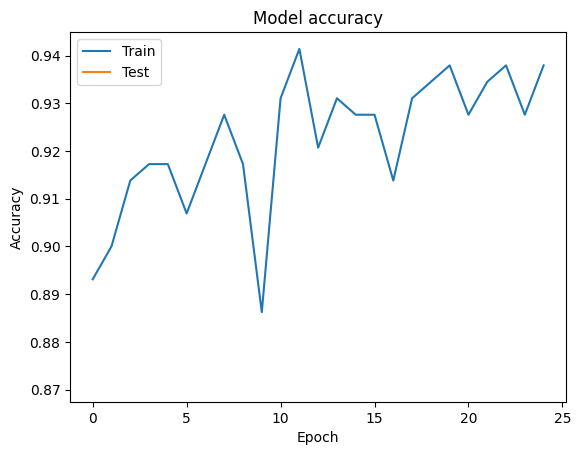

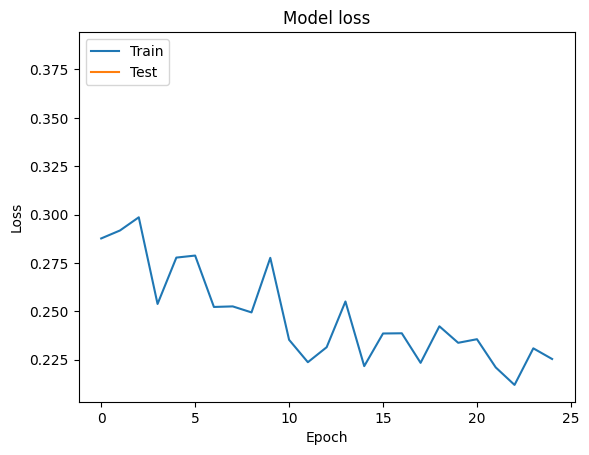

In [15]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
# MAKING PREDICTIONS:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image
import os

1/1 [==============================] - 0s 257ms/step
This is Nicolas Cage:


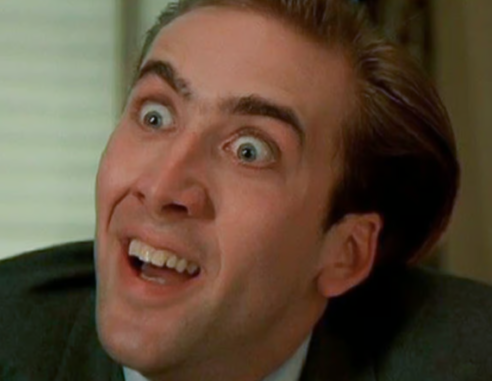

In [19]:
file = "/content/drive/MyDrive/PDAN8411 ICE 1/nicolas cage.png"
test_image = image.load_img(file, target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'This is Nicolas Cage:'
else:
    prediction = 'This is not Nicolas Cage:'

print(prediction)
img = Image(file, width = "400", height = "400")
display(img)
print("\n")
print("\n")

1/1 [==============================] - 0s 132ms/step
This is Nicolas Cage:


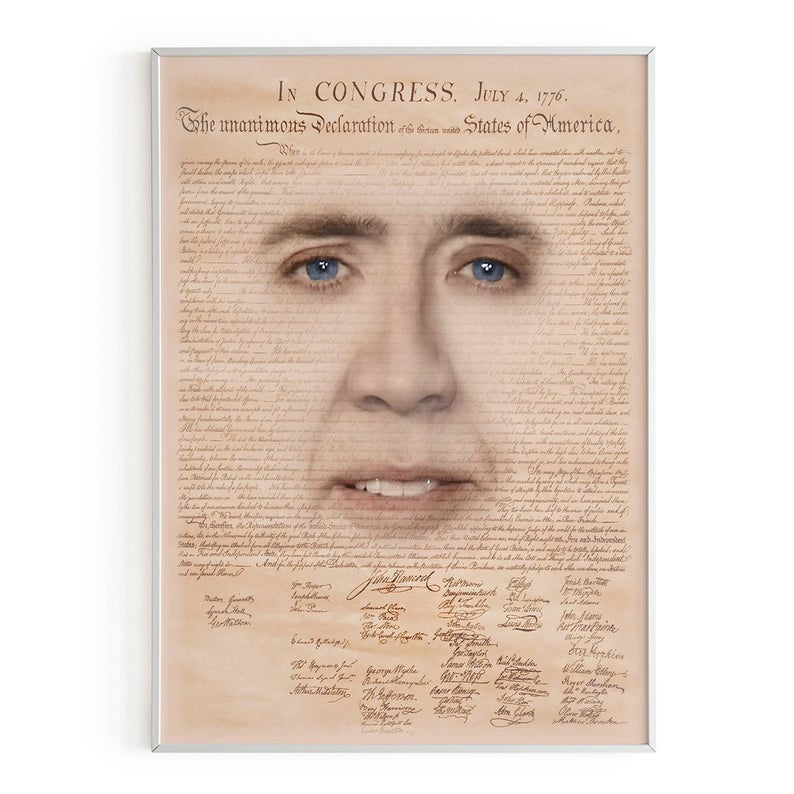





1/1 [==============================] - 0s 35ms/step
This is Nicolas Cage:


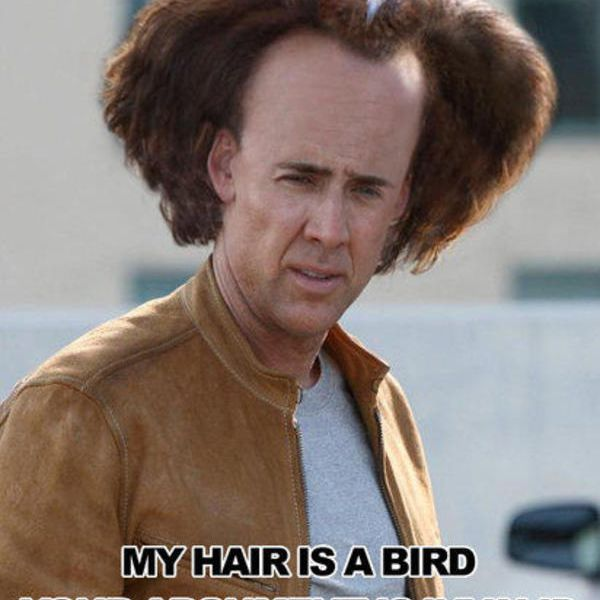





1/1 [==============================] - 0s 33ms/step
This is not Nicolas Cage:


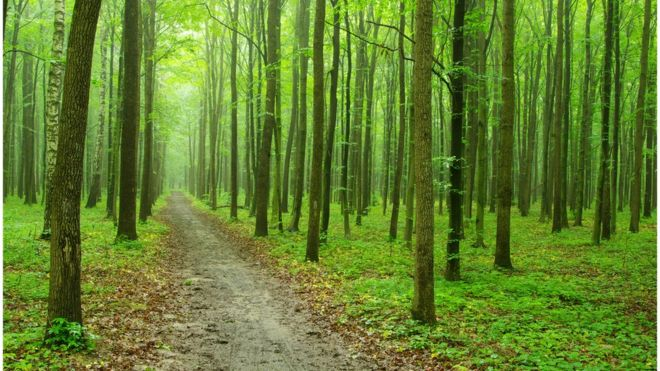





1/1 [==============================] - 0s 34ms/step
This is not Nicolas Cage:


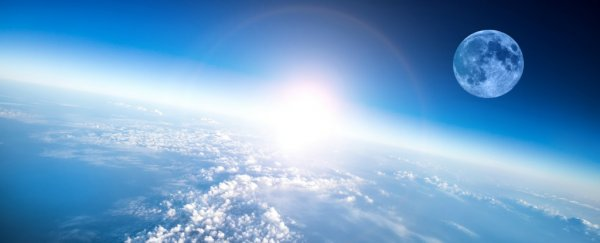





1/1 [==============================] - 0s 32ms/step
This is Nicolas Cage:


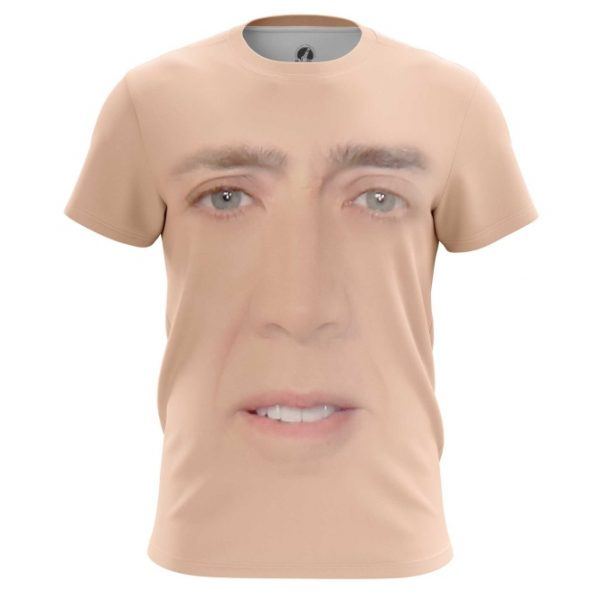





1/1 [==============================] - 0s 32ms/step
This is Nicolas Cage:


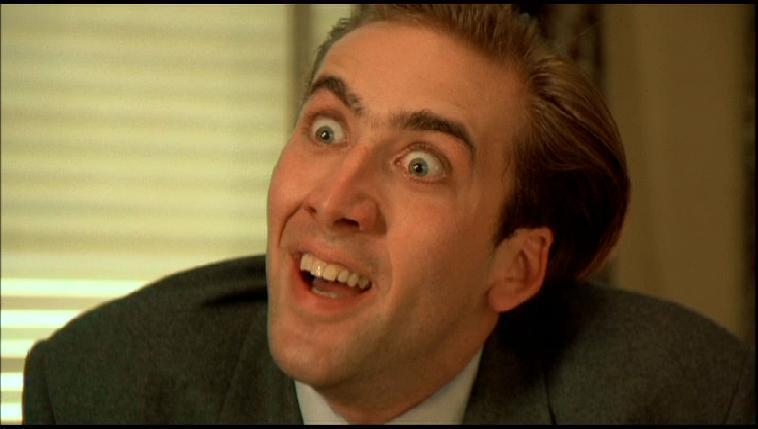





1/1 [==============================] - 0s 32ms/step
This is not Nicolas Cage:


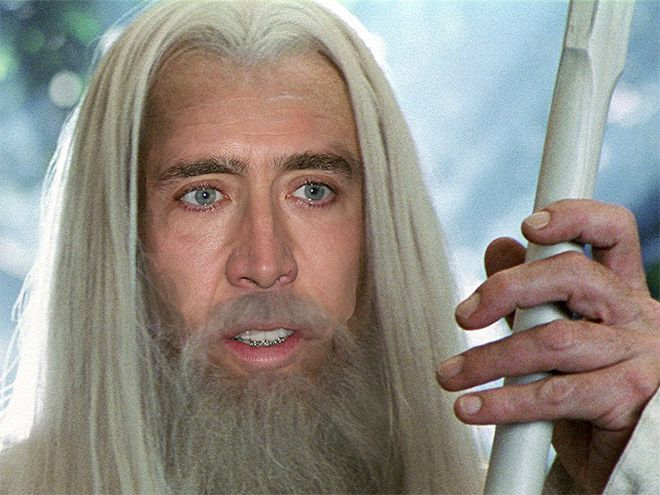





1/1 [==============================] - 0s 35ms/step
This is Nicolas Cage:


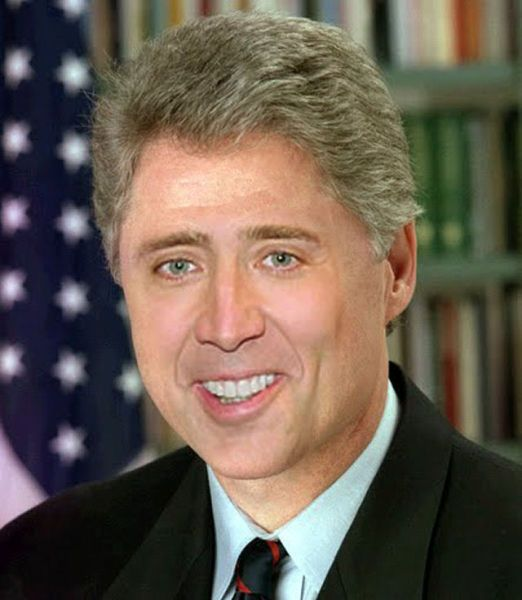





1/1 [==============================] - 0s 31ms/step
This is Nicolas Cage:


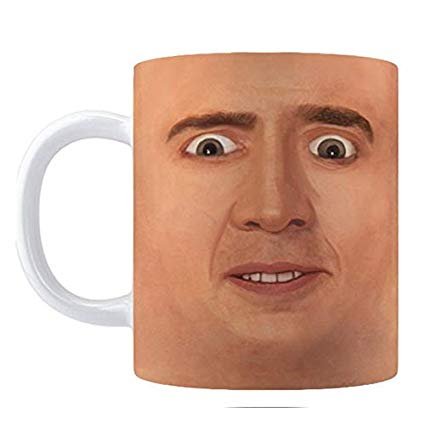





1/1 [==============================] - 0s 33ms/step
This is not Nicolas Cage:


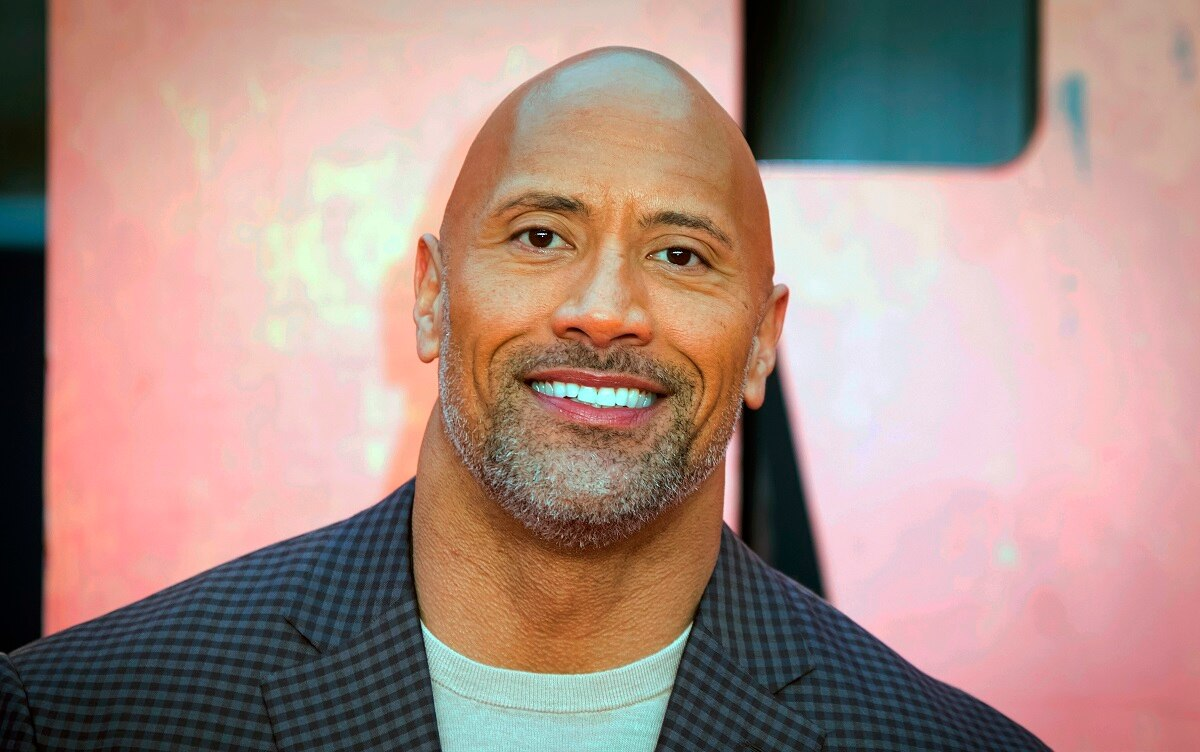





1/1 [==============================] - 0s 32ms/step
This is Nicolas Cage:


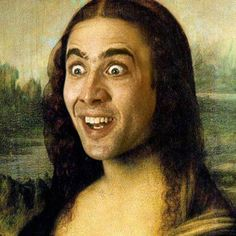

In [20]:
predict_path = '/content/drive/MyDrive/PDAN8411 ICE 1/Nicolas_Cage-master/Nicolas_Cage-master/Predict'

for file in os.listdir(predict_path):
    if not file.startswith('.'): # to avoid .ds_store files on my mac
        file = predict_path + "/" + file

        test_image = image.load_img(file, target_size = (200, 200))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)

        result = classifier.predict(test_image)

        training_set.class_indices
        if result[0][0] == 1:
            prediction = 'This is Nicolas Cage:'
        else:
            prediction = 'This is not Nicolas Cage:'

        print(prediction)
        img = Image(file, width = "400", height = "400")
        display(img)
        print("\n")
        print("\n")